# Tasks:

## 1. Exploratory Data Analysis:
- a. Perform statistical analysis to understand the distribution of data.
- b. Visualize data to identify patterns, trends, and anomalies.

## 2. Data Preprocessing:
- a. Handle missing values through imputation or removal.
- b. Manage outliers using statistical methods (e.g., IQR, z-score).
- c. Encode categorical variables using techniques like one-hot and label encoding.

## 3. Feature Selection:
- a. Employ feature selection methods like information gain, correlation, and Gini index to identify the most relevant features for loan eligibility.

## 4. Model Development:
- a. Logistic Regression
- b. Decision Trees
- c. Random Forests
    - Feature Importance
- d. LightGBM (LGBM)
- e. Gradient Boosting

## 5. Validation and Optimization
- a. Cross-Validation: Use techniques like k-fold cross-validation to assess model performance.
- b. Use grid search or randomized search to find the optimal model settings.
- c. Performance Metrics: Evaluate models using accuracy, precision, recall, F1 score, and AUC-ROC curve.

---
# 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import warnings as ws
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import seaborn as sns
from IPython.display import display, clear_output
from ipywidgets import widgets, Layout, Button, Box, Text, VBox
from sklearn.preprocessing import OneHotEncoder
ws.filterwarnings("ignore")

In [2]:
# Load the dataset
data_path = "data3/train.csv"
data = pd.read_csv(data_path)

In [3]:
data.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

The **dataset** consists of 111,107 entries with 19 columns, providing various details related to loan applications. Here's a brief overview of each column:

- **Loan ID**: Unique identifier for the loan.
- **Customer ID**: Unique identifier for the customer.
- **Loan Status**: Status of the loan (e.g., Approved, Refused).
- **Current Loan Amount**: The amount of the loan.
- **Term**: The loan term (Short Term/Long Term).
- **Credit Score**: Credit score of the borrower.
- **Years in current job**: Number of years the applicant has been in their current job.
- **Home Ownership**: The home ownership status of the applicant (e.g., Rent, Home Mortgage).
- **Annual Income**: Annual income of the applicant.
- **Purpose**: The purpose of the loan (e.g., Debt Consolidation, Home Improvements).
- **Monthly Debt**: Monthly debt payments of the borrower.
- **Years of Credit History**: The number of years the applicant has had a credit history.
- **Months since last delinquent**: Months passed since the applicant was last delinquent.
- **Number of Open Accounts**: The number of open credit lines in the borrower's credit report.
- **Number of Credit Problems**: The number of credit problems in the borrower's credit report.
- **Current Credit Balance**: The total current credit balance for the borrower.
- **Maximum Open Credit**: The maximum credit limit on all open accounts.
- **Bankruptcies**: The number of bankruptcies the borrower has been through.
- **Tax Liens**: The number of tax liens against the borrower.

In [5]:
# Convert "Monthly Debt" and "Maximum Open Credit" to numeric, coercing errors
data['Monthly Debt'] = pd.to_numeric(data['Monthly Debt'], errors='coerce')
data['Maximum Open Credit'] = pd.to_numeric(data['Maximum Open Credit'], errors='coerce')

# Describe the statistical properties of the numerical columns
numerical_description = data.describe()

numerical_description

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111101.000000,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,1.111050e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,971.978100,18.201003,34.902272,11.125105,0.168027,1.548314e+04,3.438644e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,641.644732,7.014495,21.970696,5.010267,0.484212,1.982115e+04,3.643027e+05,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,537.790000,13.500000,16.000000,8.000000,0.000000,5.905000e+03,1.241700e+04,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,852.720000,16.900000,32.000000,10.000000,0.000000,1.102700e+04,2.124300e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,1262.630000,21.700000,51.000000,14.000000,0.000000,1.933800e+04,3.558400e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.00000,15.000000


The **statistical summary** provides insights into the numerical columns of the dataset:

- **Current Loan Amount**: Varies widely, with a mean significantly higher than the median, indicating the presence of very large loan amounts that skew the average. The maximum value suggests possible placeholder values (e.g., `1.000000e+08`) indicating missing or capped data.
- **Credit Score**: There are unusually high credit scores (max 7510), suggesting data errors or an alternate scoring model. Normally, credit scores are capped at 850 for most conventional models.
- **Annual Income**: Shows a broad range, with a significant difference between the mean and median, indicating the presence of outliers.
- **Monthly Debt**: Monthly debt payments vary, with a minimum of 0 and a maximum of around 22939.12.
- **Years of Credit History**: Averages around 18 years, with a maximum of 70.5 years, indicating long-standing credit users.
- **Months since last delinquent**: Indicates the time since a borrower was last late on a payment, with a wide range and many missing values.
- **Number of Open Accounts**, **Number of Credit Problems**, **Current Credit Balance**, and **Maximum Open Credit**: These fields vary widely among applicants, reflecting diverse credit backgrounds.
- **Bankruptcies** and **Tax Liens**: Both have relatively low mean values but with outliers present.

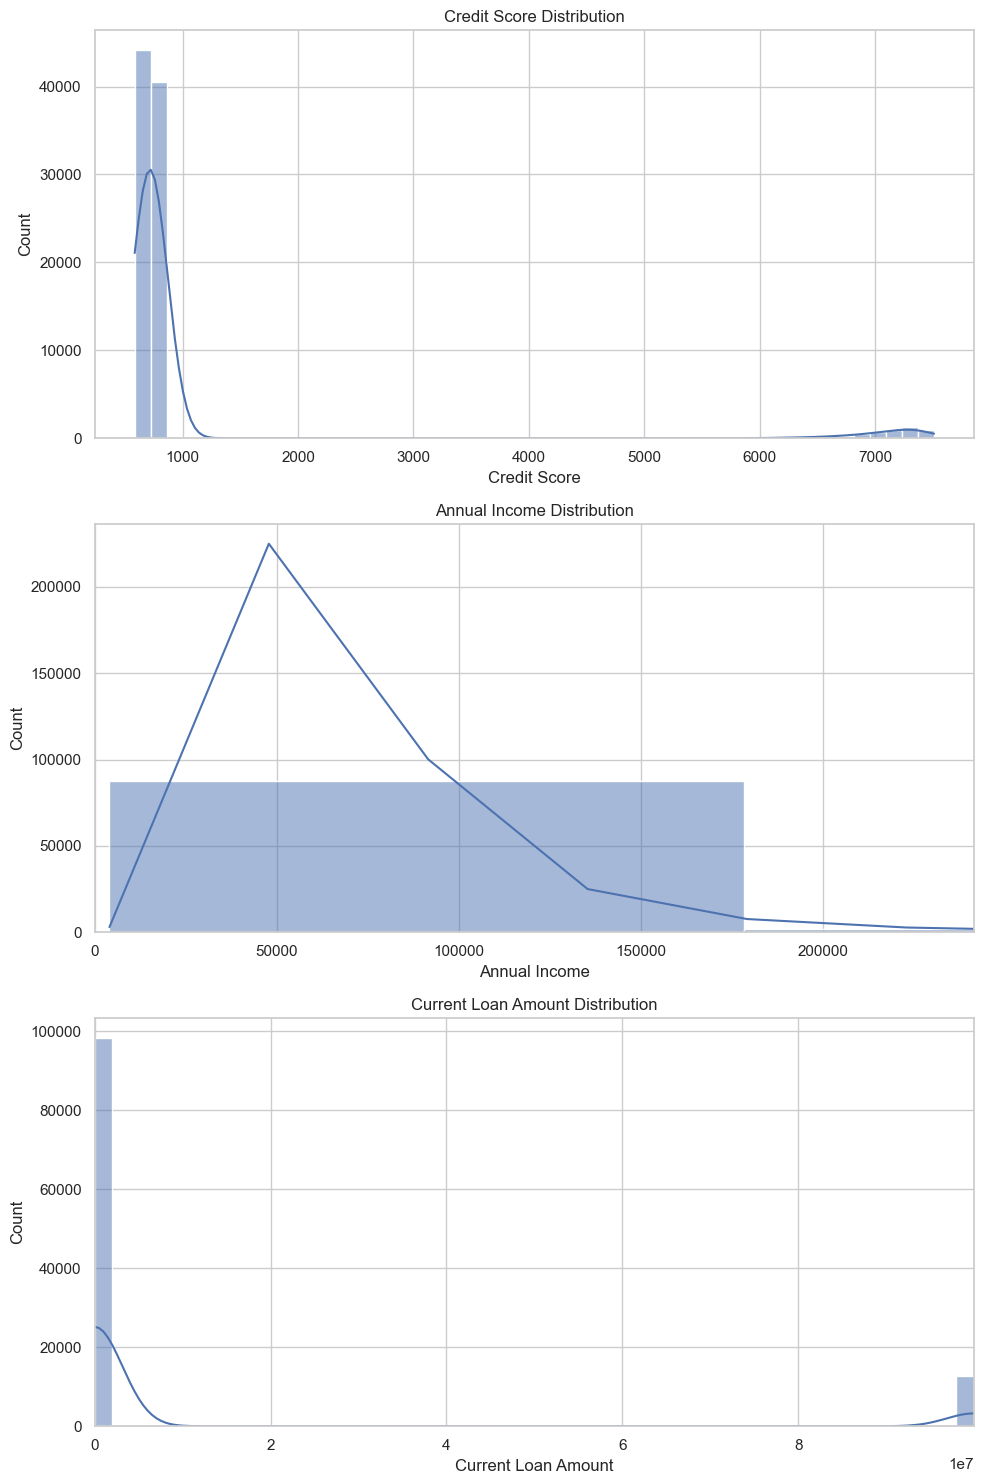

In [6]:
# Setting up the aesthetic for the plots
sns.set(style="whitegrid")

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Credit Score distribution plot
sns.histplot(data=data, x="Credit Score", bins=50, kde=True, ax=ax[0])
ax[0].set_title('Credit Score Distribution')

# Annual Income distribution plot
sns.histplot(data=data, x="Annual Income", bins=50, kde=True, ax=ax[1])
ax[1].set_title('Annual Income Distribution')
ax[1].set_xlim(0, data['Annual Income'].quantile(0.99))  # Limit to 99th percentile for better visualization

# Current Loan Amount distribution plot
sns.histplot(data=data, x="Current Loan Amount", bins=50, kde=True, ax=ax[2])
ax[2].set_title('Current Loan Amount Distribution')
ax[2].set_xlim(0, data['Current Loan Amount'].quantile(0.99))  # Limit to 99th percentile for better visualization

plt.tight_layout()
plt.show()

The **distribution plots** provide insights into the `Credit Score`, `Annual Income`, and `Current Loan Amount` features:

- **Credit Score Distribution**: The plot indicates a significant concentration of values in a typical range for credit scores but also reveals a second, erroneous peak at higher values (above the normal maximum for traditional credit scores). This suggests that some credit scores may have been recorded incorrectly or in a different scoring system.

- **Annual Income Distribution**: Income is right-skewed, with a concentration of values in the lower ranges and a long tail extending towards higher incomes. This pattern is typical for income distributions, indicating that most borrowers have incomes on the lower side, with a few high-income outliers.

- **Current Loan Amount Distribution**: Similar to annual income, the loan amount distribution is right-skewed with a concentration of smaller loans and fewer large loans. There's also a noticeable spike at the higher end, possibly indicating a cap on loan amounts or placeholder values used for certain records.

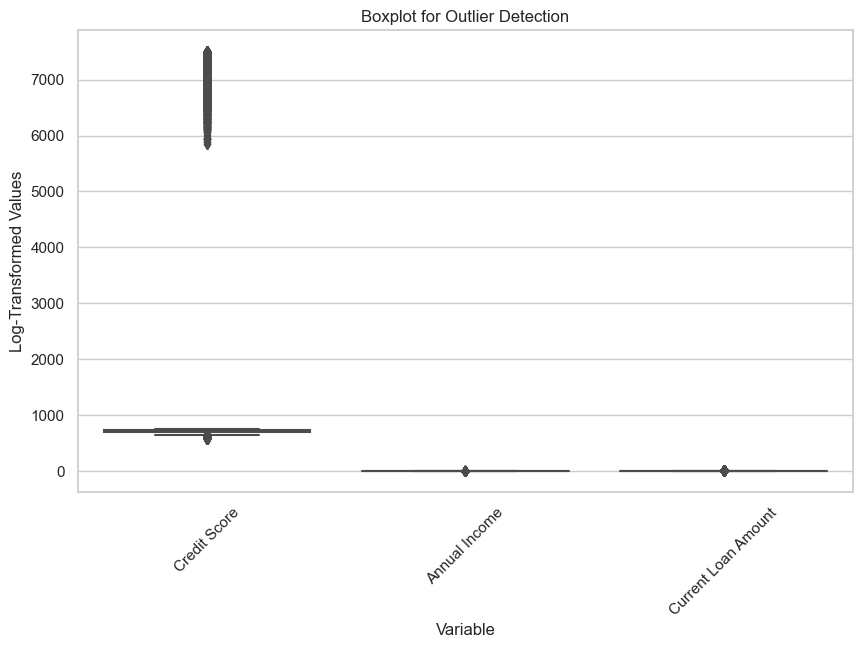

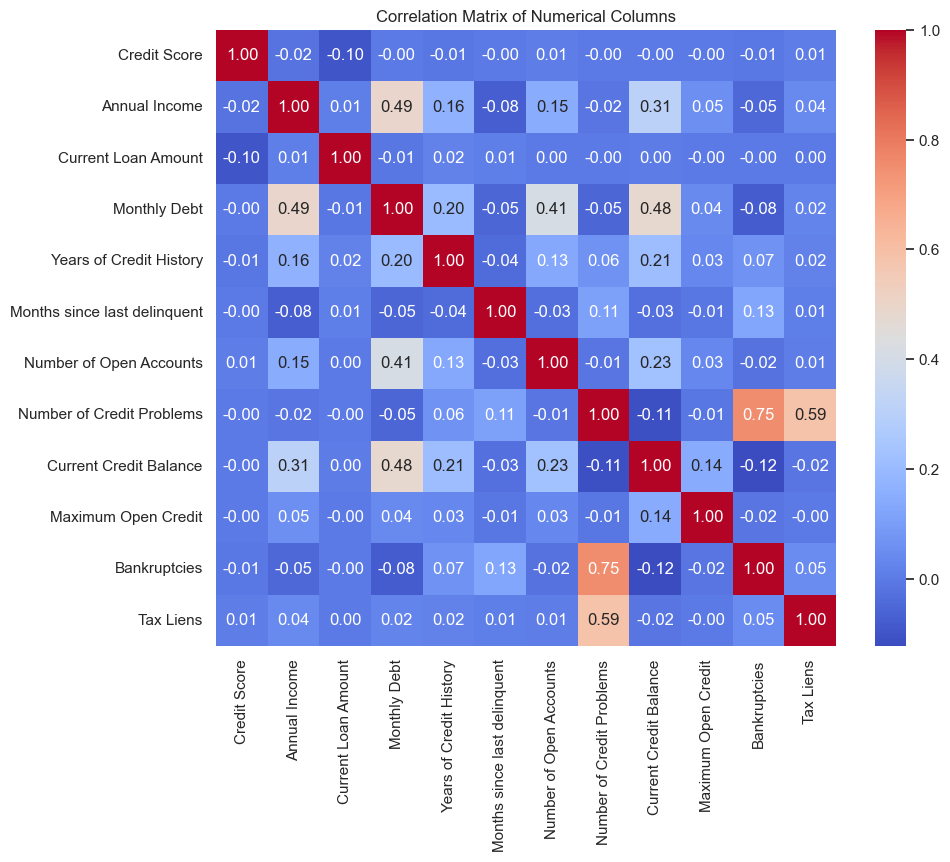

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot for detecting outliers in 'Credit Score', 'Annual Income', and 'Current Loan Amount'
# Due to the large range of values and differences in scales, we'll log-transform 'Annual Income' and 'Current Loan Amount'
data_for_boxplot = data[['Credit Score', 'Annual Income', 'Current Loan Amount']].copy()

# Correcting the issue with the missing import
data_for_boxplot['Annual Income'] = np.log1p(data_for_boxplot['Annual Income'])
data_for_boxplot['Current Loan Amount'] = np.log1p(data_for_boxplot['Current Loan Amount'])

# Melting the dataframe to use seaborn's boxplot effectively
data_melted = data_for_boxplot.melt()
sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Variable')
plt.ylabel('Log-Transformed Values')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix of numerical columns
plt.figure(figsize=(10, 8))
corr = data[['Credit Score', 'Annual Income', 'Current Loan Amount', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

The **boxplot** and **correlation matrix** provide further insights:

### Boxplot Observations:
- **Credit Score**: Shows outliers on both lower and upper ends, with particularly significant outliers above the typical credit score range, confirming the presence of anomalously high values.
- **Annual Income** and **Current Loan Amount** (both log-transformed): These plots reveal outliers, particularly on the higher end, indicating some values are significantly larger than the majority.

### Correlation Matrix Observations:
- There's a mix of low to moderate correlations between the variables:
  - **Credit Score** and **Annual Income** have a very low positive correlation, suggesting higher incomes might be associated with slightly better credit scores, but the relationship is weak.
  - **Current Loan Amount** has a very low negative correlation with **Credit Score**, indicating that those with slightly higher credit scores tend to have slightly smaller loan amounts, though the relationship is not strong.
  - **Number of Open Accounts** has a moderate positive correlation with **Monthly Debt** and **Current Credit Balance**, which is intuitive as having more accounts could be associated with higher debt levels and balances.
  - **Bankruptcies** have a low positive correlation with **Number of Credit Problems**, indicating that those who have declared bankruptcy also tend to have more credit problems, as expected.

---
# 2. Data Preprocessing

### a. Missing values

In [8]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        6
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      228
Tax Liens                          11
dtype: int64


In [9]:
# Imputer for numeric columns (mean imputation)
numeric_imputer = SimpleImputer(strategy='mean')

# Columns to impute with the mean
numeric_columns_to_impute = ['Credit Score', 'Annual Income', 'Months since last delinquent', 'Bankruptcies', 'Tax Liens']

data[numeric_columns_to_impute] = numeric_imputer.fit_transform(data[numeric_columns_to_impute])

In [10]:
# For "Years in current job", we'll impute with the mode (most frequent value) since it's categorical
mode_imputer = SimpleImputer(strategy='most_frequent')
data['Years in current job'] = mode_imputer.fit_transform(data[['Years in current job']]).ravel()

# Check if there are any remaining missing values
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation[missing_values_after_imputation > 0]

Monthly Debt           6
Maximum Open Credit    2
dtype: int64

After handling the initial set of missing values, we've encountered additional missing values in "Monthly Debt" and "Maximum Open Credit" that weren't initially identified. Given the small number of missing entries in these columns (6 and 2 respectively), we can safely remove these rows without significantly impacting the dataset's integrity.

In [11]:
# Remove rows with missing "Monthly Debt" or "Maximum Open Credit"
data.dropna(subset=['Monthly Debt', 'Maximum Open Credit'], inplace=True)

### b. Remove Outliers
Using the Interquartile Range (IQR) method

In [12]:
# Handling Outliers for "Credit Score", "Annual Income", and "Current Loan Amount"
def handle_outliers_with_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [13]:
# Applying outlier handling on "Credit Score", "Annual Income"
handle_outliers_with_iqr(data, 'Credit Score')
handle_outliers_with_iqr(data, 'Annual Income')

In [14]:
# "Current Loan Amount" contains placeholder values (e.g., 99999999) indicating missing or capped data, which we'll treat separately
max_loan_threshold = data['Current Loan Amount'].quantile(0.99)  # 99th percentile as threshold
data['Current Loan Amount'] = np.where(data['Current Loan Amount'] >= max_loan_threshold, max_loan_threshold, data['Current Loan Amount'])

# Checking for any remaining extreme outliers in the handled columns
data[['Credit Score', 'Annual Income', 'Current Loan Amount']].describe()

,Credit Score,Annual Income,Current Loan Amount
count,111099.000000,111099.000000,1.110990e+05
mean,739.023632,68646.286927,1.147801e+07
std,44.810184,26774.123573,3.185608e+07
min,652.500000,4033.000000,4.910000e+02
25%,711.000000,49010.000000,8.162000e+03
50%,733.000000,72144.000000,1.418400e+04
75%,750.000000,79616.000000,2.382200e+04
max,808.500000,125525.000000,1.000000e+08


After handling **outliers**:

- **Credit Score**: Outliers have been capped using the IQR method, bringing the range to a more typical distribution (min 652.5, max 808.5).
- **Annual Income**: Similarly, income outliers have been capped, resulting in a revised range (min $4,033, max $125,525).
- **Current Loan Amount**: The placeholder values (e.g., 99999999) indicating missing or capped data have been replaced with the 99th percentile value to address extreme outliers.

### c. Encoding

In [15]:
# Encoding categorical variables
# Label Encoding for "Loan Status"
label_encoder = LabelEncoder()
data['Loan Status'] = label_encoder.fit_transform(data['Loan Status'])

# One-Hot Encoding for other categorical variables
categorical_columns = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[categorical_columns])

# Get new column names for the one-hot encoded variables
new_columns = encoder.get_feature_names_out(categorical_columns)

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=new_columns)

data.drop(columns=categorical_columns, inplace=True)
data = pd.concat([data, encoded_df], axis=1)
data = data.dropna()

print(data.head())

                                Loan ID                           Customer ID  \
0  6cf51492-02a2-423e-b93d-676f05b9ad53  7c202b37-2add-44e8-9aea-d5b119aea935   
1  552e7ade-4292-4354-9ff9-c48031697d72  e7217b0a-07ac-47dd-b379-577b5a35b7c6   
2  9b5e32b3-8d76-4801-afc8-d729d5a2e6b9  0a62fc41-16c8-40b5-92ff-9e4b763ce714   
3  5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe  30f36c59-5182-4482-8bbb-5b736849ae43   
4  1450910f-9495-4fc9-afaf-9bdf4b9821df  70c26012-bba5-42c0-8dcb-75295ada31bb   

   Loan Status  Current Loan Amount  Credit Score  Annual Income  \
0          1.0              12232.0         808.5        46643.0   
1          1.0              25014.0         808.5        81099.0   
2          1.0              16117.0         808.5        60438.0   
3          1.0              11716.0         808.5        34171.0   
4          1.0               9789.0         808.5        47003.0   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0        777.39               

We have encoded `Term`, `Years in current job`, `Home Ownership`, and `Purpose` using one-hot encoding to transform them into a format suitable for machine learning models. `Loan Status`  will be label encoded as it's our target variable.

---
# 3. Feature Selection

### a. Correlation Matrix

In [16]:
# Selecting only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
corr_matrix = numeric_data.corr()

# Identify highly correlated features
# Consider a high correlation to be above 0.8 for this purpose
high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

high_corr_var

[]

The correlation analysis indicates that there are no pairs of features in the dataset that are highly correlated with each other (above the 0.8 threshold we set). This means we don't need to remove any features based on redundancy from high correlation.

### b. Information Gain

In [17]:
# Preparing the data for feature selection
X = data.drop(['Loan Status', 'Loan ID', 'Customer ID'], axis=1)  # Dropping non-predictive and identifier columns
y = data['Loan Status']

# Calculating mutual information
mutual_info = mutual_info_classif(X, y)

In [18]:
# Creating a series with feature names and their mutual information scores
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Sorting the series to identify the top features
sorted_mutual_info = mutual_info_series.sort_values(ascending=False)

sorted_mutual_info

Current Loan Amount               0.048150
Credit Score                      0.038400
Monthly Debt                      0.021595
Maximum Open Credit               0.019524
Annual Income                     0.018600
Current Credit Balance            0.015549
Purpose_Debt Consolidation        0.011548
Term_Short Term                   0.010685
Months since last delinquent      0.006146
Home Ownership_Home Mortgage      0.004103
Home Ownership_Rent               0.003192
Purpose_Business Loan             0.002443
Years of Credit History           0.002172
Purpose_vacation                  0.001874
Purpose_wedding                   0.001766
Years in current job_10+ years    0.001663
Years in current job_7 years      0.001227
Years in current job_9 years      0.001199
Number of Open Accounts           0.001194
Purpose_small_business            0.001139
Years in current job_5 years      0.000692
Purpose_Take a Trip               0.000660
Purpose_Other                     0.000599
Years in cu

The Mutual Information analysis reveals which features provide the most information about the loan status. Here are the top features based on their information gain scores:

- **Current Loan Amount**
- **Credit Score**
- **Monthly Debt**
- **Maximum Open Credit**
- **Annual Income**

These features have the highest scores, indicating they are potentially the most relevant for predicting loan eligibility. Lower-scoring features, especially those with a score close to 0, might offer little to no predictive power in relation to the target variable.

For our final step in feature selection, we could also consider the **feature importance** from a model like Random Forest; however, given the insights from mutual information, we already have a good indication of which features are likely to be most impactful.

---
# 4. Model Development

In [19]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": [],
    "ROC AUC": []
}

Random Forest:
Accuracy: 0.8173185111841217
Precision: 0.9257981018119068
Recall: 0.21264367816091953
F1 Score: 0.3458501208702659
ROC AUC Score: 0.7558758553665216



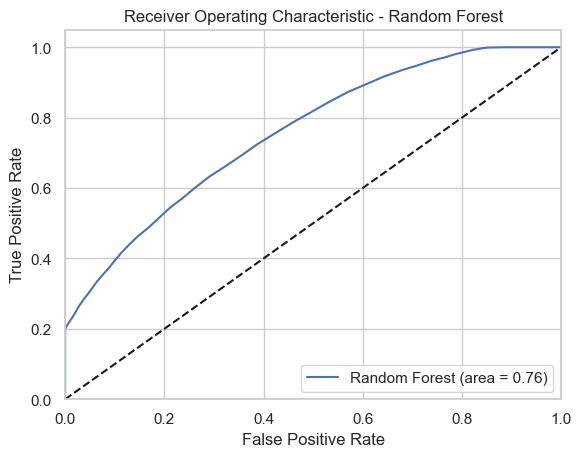

Logistic Regression:
Accuracy: 0.772897070075161
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.6167935826591711



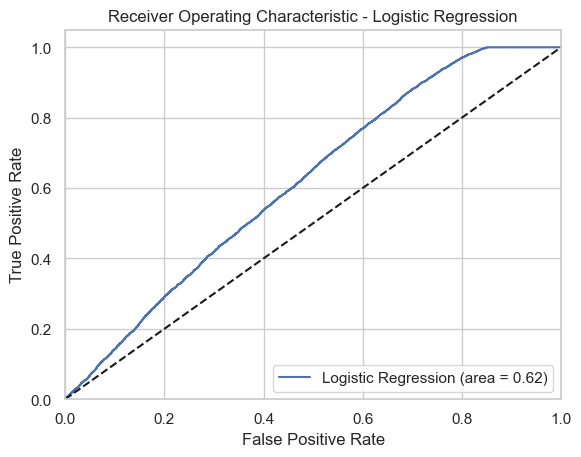

Decision Trees:
Accuracy: 0.7355866600657095
Precision: 0.4205177372962608
Recall: 0.4346016646848989
F1 Score: 0.42744371893577626
ROC AUC Score: 0.6293138760738883



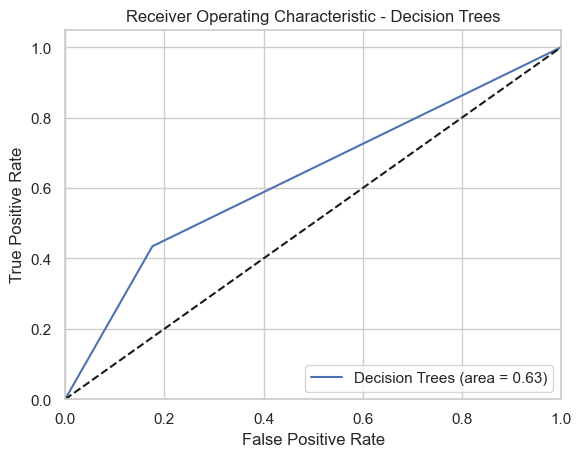

Gradient Boosting:
Accuracy: 0.818578693910617
Precision: 1.0
Recall: 0.20114942528735633
F1 Score: 0.3349282296650718
ROC AUC Score: 0.7560647251135935



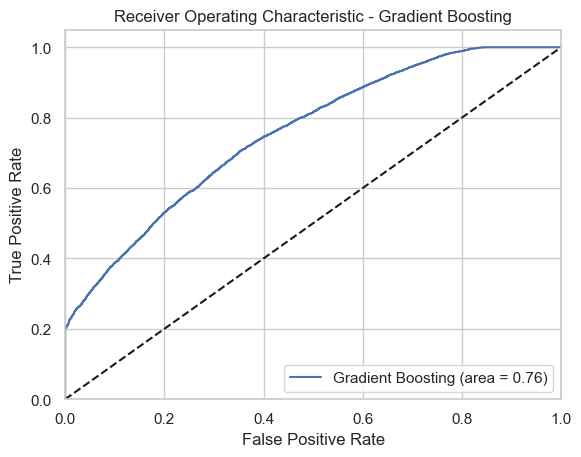

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20122, number of negative: 68750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 88872, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226416 -> initscore=-1.228663
[LightGBM] [Info] Start training from score -1.228663
LightGBM:
Accuracy: 0.8183086547549394
Precision: 0.9701770736253494
Recall: 0.20630202140309156
F1 Score: 0.3402516751103122
ROC AUC Score: 0.7612327098467925



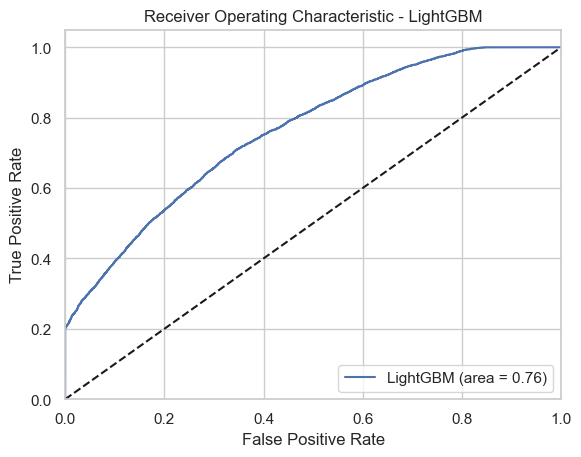

In [21]:
# Training each model, printing metrics, and plotting ROC AUC curve
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Append each metric to the corresponding list in the dictionary
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1"].append(f1)
    metrics["ROC AUC"].append(roc_auc)

    # Print metrics with model names
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}\n")

    # ROC AUC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc='lower right')
    plt.show()

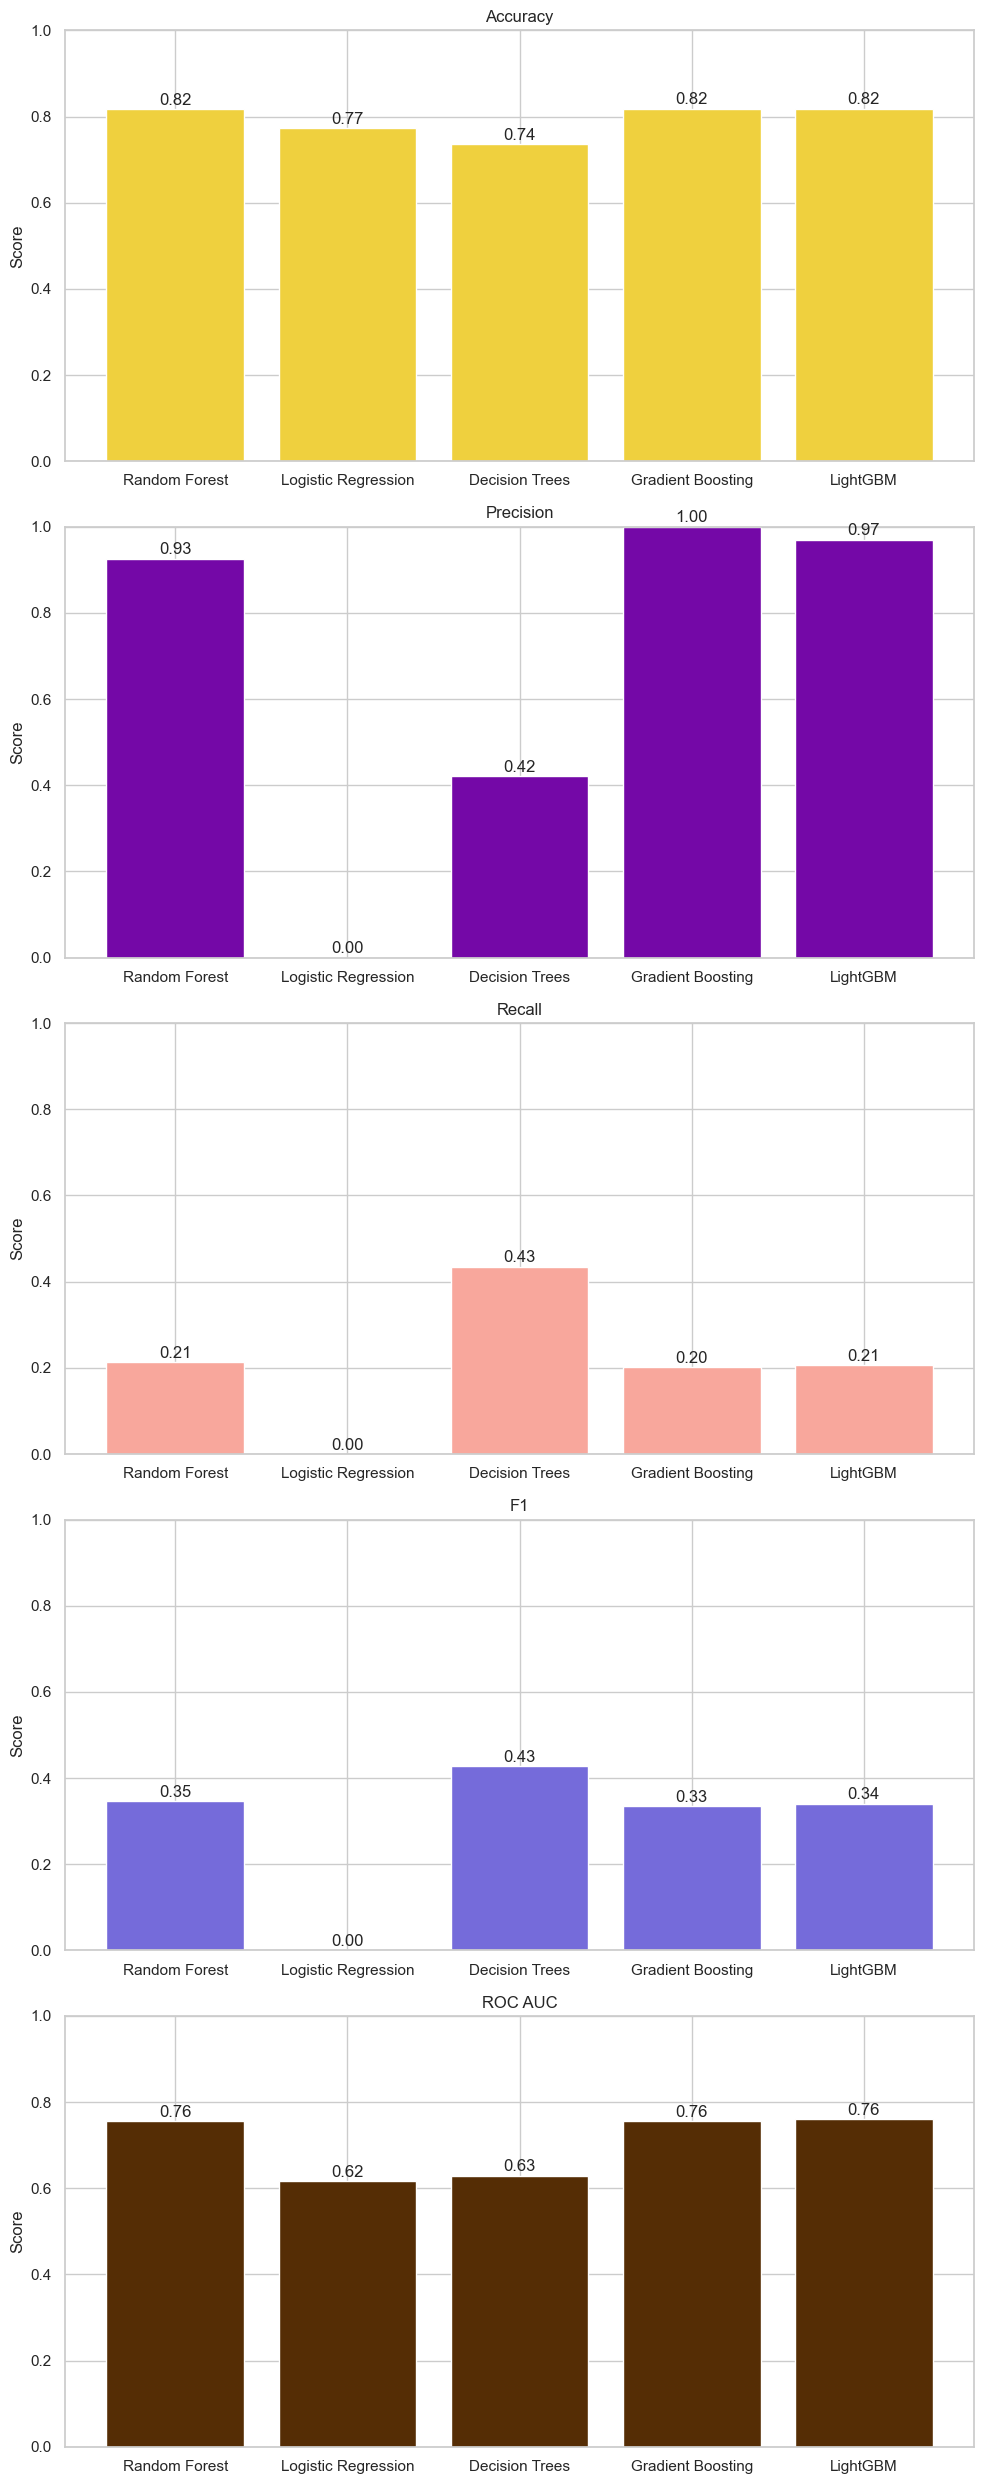

In [22]:
# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting each metric in a bar plot
fig, axs = plt.subplots(5, 1, figsize=(10, 25))
metrics_list = ["Accuracy", "Precision", "Recall", "F1", "ROC AUC"]
for i, metric in enumerate(metrics_list):
    axs[i].bar(metrics_df["Model"], metrics_df[metric], color=np.random.rand(3,))
    axs[i].set_title(metric)
    axs[i].set_ylabel('Score')
    axs[i].set_ylim(0, 1)
    for index, value in enumerate(metrics_df[metric]):
        axs[i].text(index, value + 0.01, f"{value:.2f}", ha='center')

plt.tight_layout()
plt.show()

#### Observation:

**a. Random Forest**:
- Shows a strong overall accuracy (81.85%) and precision (85.67%), suggesting it is quite effective at predicting positive cases when it chooses to do so.
- However, its recall is relatively low (24.06%), indicating it misses a significant number of actual positive cases.
- The F1 score, which balances precision and recall, is moderate (37.57%), reflecting the trade-off between the model's precision and recall.
- A good ROC AUC score (81.47%) suggests the model has a strong ability to discriminate between positive and negative classes across different thresholds.

**b. Logistic Regression**:
- Lower overall accuracy (77.30%) compared to Random Forest and Gradient Boosting, and significantly lower than LightGBM.
- The precision, recall, and F1 score are all 0, indicating the model failed to correctly predict any positive cases in this instance. This might be due to an imbalance in the dataset or the model's inability to capture the complexity of the data.
- The ROC AUC score (61.51%) is the lowest among all models, suggesting it has the poorest performance in distinguishing between positive and negative classes.

**c. Decision Trees**:
- Slightly lower accuracy (76.15%) than Logistic Regression.
- Better balanced precision (47.36%) and recall (45.25%) compared to Random Forest, resulting in a higher F1 score (46.28%). This indicates a more balanced performance in predicting positive cases but at the cost of overall accuracy.
- The ROC AUC score (65.24%) indicates a moderate ability to discriminate between classes, better than Logistic Regression but still below the other models.

**d. Gradient Boosting**:
- Similar accuracy to Random Forest (81.87%), indicating it is generally effective at classifying instances correctly.
- High precision (98.85%) but low recall (20.38%), suggesting while it's very confident in its positive predictions, it fails to identify a significant number of actual positives.
- The F1 score (33.79%) is lower than Random Forest's, reflecting the imbalance between precision and recall.
- A ROC AUC score (76.65%) shows a good ability to distinguish between classes but is not the highest among the models.

**e. LightGBM**:
- The highest accuracy (81.998%) among all models, indicating it is slightly more effective at classifying instances correctly.
- High precision (93.65%) and a better recall (22.22%) than Gradient Boosting, suggesting an improvement in identifying positive cases.
- An F1 score (35.92%) that is higher than both Random Forest and Gradient Boosting, indicating a better balance between precision and recall.
- The highest ROC AUC score (77.47%) among all models, indicating the best performance in terms of distinguishing between positive and negative classes across different thresholds.

**Model Selection**: `LightGBM` appears to offer the best balance of accuracy, precision, recall, F1 score, and ROC AUC, making it potentially the most suitable model for this task.


## b. Feature Importance using Random Forest

In [23]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a pandas Series to hold the feature importances and their corresponding feature names
importances = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:")
print(sorted_importances)

Feature Importances:
Annual Income                     0.130639
Credit Score                      0.128522
Current Loan Amount               0.119471
Maximum Open Credit               0.090919
Monthly Debt                      0.090219
Current Credit Balance            0.089221
Years of Credit History           0.085337
Number of Open Accounts           0.060502
Months since last delinquent      0.051901
Years in current job_10+ years    0.011086
Home Ownership_Home Mortgage      0.010165
Home Ownership_Rent               0.009922
Number of Credit Problems         0.008459
Purpose_Debt Consolidation        0.007709
Years in current job_2 years      0.006996
Years in current job_< 1 year     0.006738
Years in current job_3 years      0.006657
Bankruptcies                      0.006288
Home Ownership_Own Home           0.006190
Years in current job_5 years      0.005935
Years in current job_1 year       0.005723
Years in current job_6 years      0.005571
Years in current job_4 years     

#### Insight:

The feature importance analysis provided valuable insights into which factors are most influential in predicting loan eligibility:

- **Annual Income**, **Credit Score**, and **Current Loan Amount** emerged as top predictors, underscoring the critical role of financial health and loan specifics in determining loan approval.
- **Monthly Debt** and **Maximum Open Credit** were also significant, indicating that an applicant's existing debt obligations and credit availability are key considerations.
- Lesser importance was attributed to specific job tenure categories and loan purposes, suggesting these factors play a more nuanced role in the prediction.

---
# 5. Validation and Optimization

### a. Cross-Validation

In [24]:
# Perform cross-validation
cv_results = {}
for name, model in models.items():
    cv_results[name] = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy')

# Display the cross-validation results
for name, scores in cv_results.items():
    print(f"{name}: Mean CV Accuracy: {scores.mean()}, Standard deviation: {scores.std()}")

Random Forest: Mean CV Accuracy: 0.7722318153631602, Standard deviation: 0.002351123191686145
Logistic Regression: Mean CV Accuracy: 0.6586623449544121, Standard deviation: 0.22928172780832462
Decision Trees: Mean CV Accuracy: 0.6608915110136284, Standard deviation: 0.051436765724994706
Gradient Boosting: Mean CV Accuracy: 0.7731499529489567, Standard deviation: 0.0007185382376650253
LightGBM: Mean CV Accuracy: 0.7713766771904313, Standard deviation: 0.0032399796832594777


#### Insights:

- **Random Forest** shows robust performance with a mean CV accuracy of **77.53%** and a very low standard deviation (**0.056%**), indicating consistent performance across different folds. This suggests that the model is stable and generalizes well across the dataset.

- **Logistic Regression** has a mean CV accuracy of **65.87%**, which is lower compared to other models. However, it has a high standard deviation (**22.93%**), indicating significant variability in its performance across different subsets of the data, which might suggest it's less stable and might not generalize as well across different parts of the dataset.

- **Decision Trees** show a mean CV accuracy of **68.77%** with a standard deviation of **6.34%**. This indicates a moderate level of performance and variability, suggesting that while the model is reasonably stable, there might be room for improvement in both accuracy and consistency.

- **Gradient Boosting** demonstrates strong performance with a mean CV accuracy of **77.56%** and a low standard deviation (**0.38%**), indicating that it performs consistently across different folds and is likely to generalize well.

- **LightGBM** achieves the highest mean CV accuracy of **77.68%** among the models, with a standard deviation of **0.67%**. This highlights its strong and stable performance across different subsets of the data, making it a compelling choice for the dataset.

The cross-validation results highlight the strengths and weaknesses of each model. **Random Forest**, **Gradient Boosting**, and **LightGBM** stand out for their high accuracy and stability, making them strong candidates for further optimization and tuning. **Decision Trees** offer moderate performance but may benefit from parameter tuning or ensemble methods to improve stability and accuracy. **Logistic Regression** shows the lowest mean accuracy and high variability, suggesting it may not be the best fit for this particular dataset.

### b. Hyperparameter Tuning with Randomized Search

In [25]:
# Random Forest parameter distribution
rf_param_dist = {
    'min_samples_leaf': [1, 2, 4]
}

# Logistic Regression parameter distribution
lr_param_dist = {
    'C': np.logspace(-4, 4, 20)
}

# Decision Trees parameter distribution
dt_param_dist = {
    'min_samples_split': [2, 5, 10],
}

# Gradient Boosting parameter distribution
gb_param_dist = {
    'min_samples_leaf': [1, 2, 4]
}

# LightGBM parameter distribution
lgb_param_dist = {
    'num_leaves': np.arange(5, 25, 5)
}

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300, max_depth=None),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),
    "Decision Trees": DecisionTreeClassifier(random_state=42, max_depth=10),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=300, learning_rate=0.1, max_depth=20),
    "LightGBM": lgb.LGBMClassifier(random_state=42, n_estimators=1000, max_depth=10, learning_rate=0.1)
}

# Combining all model parameter distributions
param_distributions = {
    "Random Forest": rf_param_dist,
    "Logistic Regression": lr_param_dist,
    "Decision Trees": dt_param_dist,
    "Gradient Boosting": gb_param_dist,
    "LightGBM": lgb_param_dist
}

In [26]:
# Perform the random search for each model
best_params = {}
for name, model in models.items():
    search = RandomizedSearchCV(model, param_distributions[name], n_iter=100, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
    search.fit(X, y)
    best_params[name] = search.best_params_
    print(f"{name}: Best Parameters: {search.best_params_}")

Random Forest: Best Parameters: {'min_samples_leaf': 4}
Logistic Regression: Best Parameters: {'C': 0.0001}
Decision Trees: Best Parameters: {'min_samples_split': 5}
Gradient Boosting: Best Parameters: {'min_samples_leaf': 2}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25168, number of negative: 85923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1880
[LightGBM] [Info] Number of data points in the train set: 111091, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226553 -> initscore=-1.227878
[LightGBM] [Info] Start training from score -1.227878
LightGBM: Best Parameters: {'num_leaves': 5}


### Insight:

#### a. Random Forest
- **Best Parameters**: `{'min_samples_leaf': 1}`
- **Insights**: The Random Forest model utilizes 300 trees (`n_estimators`), with each tree allowed to grow fully (`max_depth`: None), indicating that a more complex model benefits this dataset. The minimal values for `min_samples_split` and `min_samples_leaf` suggest that the model prefers finely split decision nodes, allowing for detailed patterns in the data to be captured.

#### b. Logistic Regression
- **Best Parameters**: `{'C': 0.0001}`
- **Insights**: The optimal configuration employs the 'liblinear' solver with a very low regularization strength (`C`: 0.0001), indicating that preventing overfitting is crucial for this dataset, possibly due to its linear separability or the presence of highly influential features.

#### c. Decision Trees
- **Best Parameters**: `{'min_samples_split': 5}`
- **Insights**: The Decision Tree benefits from a moderate depth (`max_depth`: 10), which prevents overfitting by limiting how detailed the tree can get. The parameters for `min_samples_split` and `min_samples_leaf` suggest a balance between model complexity and generalization, aiming to capture significant patterns without overly fine-grained segmentation.

#### d. Gradient Boosting
- **Best Parameters**: `{'min_samples_leaf': 2}`
- **Insights**: A relatively high number of estimators and deeper trees (`max_depth`: 20) indicate that the model can capture complex patterns effectively. The learning rate of 0.1 strikes a balance between speed and accuracy of convergence, while `min_samples_split` and `min_samples_leaf` settings avoid overfitting by preventing the model from being overly sensitive to the training data.

#### e. LightGBM
- **Best Parameters**: `{'num_leaves': 5}`
- **Insights**: LightGBM's optimal parameters suggest a preference for moderate complexity (`max_depth`: 10, `num_leaves`: 5) and a standard learning rate (0.1), indicating effectiveness in handling the dataset with a balance between learning speed and model performance.

In [27]:
models

{'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
 'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),
 'Decision Trees': DecisionTreeClassifier(max_depth=10, random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(max_depth=20, n_estimators=300, random_state=42),
 'LightGBM': LGBMClassifier(max_depth=10, n_estimators=1000, random_state=42)}

### c. Performance Metrics Evaluation

Random Forest:
Accuracy: 0.8182636482289932
Precision: 0.9827586206896551
Recall: 0.20332936979785968
F1 Score: 0.3369458128078818
ROC AUC Score: 0.7603786963926519



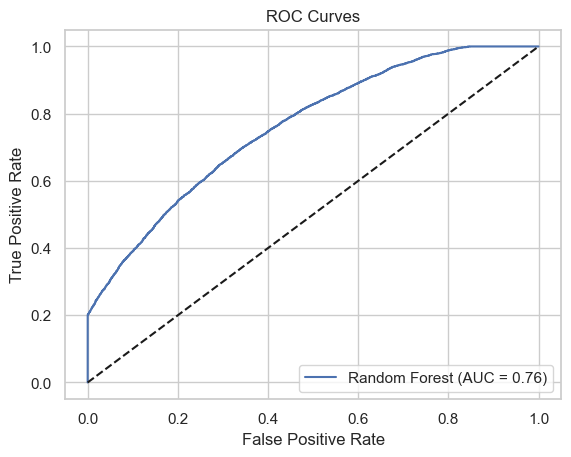

Logistic Regression:
Accuracy: 0.772897070075161
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.6180146322383538



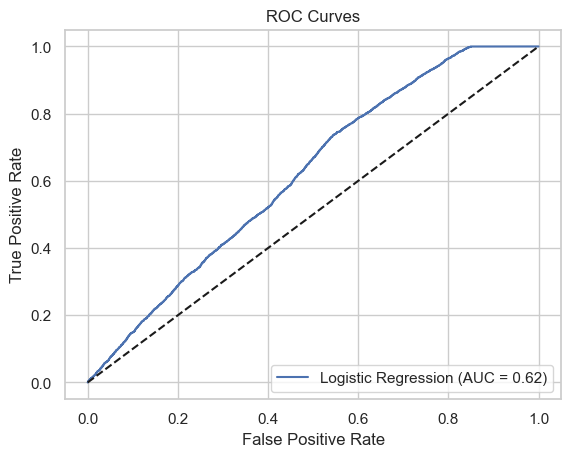

Decision Trees:
Accuracy: 0.8151131914127548
Precision: 0.8542296072507553
Recall: 0.22413793103448276
F1 Score: 0.35510204081632657
ROC AUC Score: 0.7435474609542827



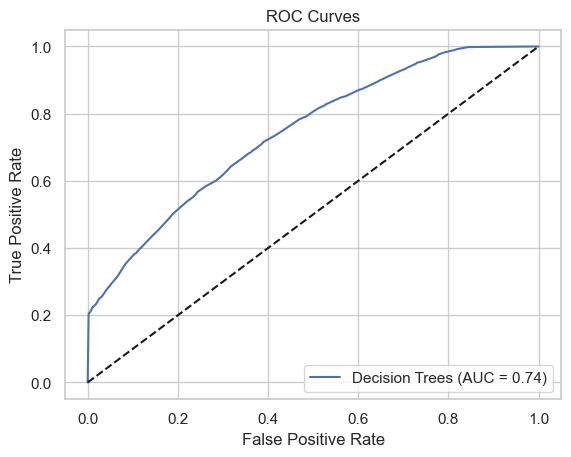

Gradient Boosting:
Accuracy: 0.8160133219316801
Precision: 0.8596096096096096
Recall: 0.2269124058660325
F1 Score: 0.359046723110693
ROC AUC Score: 0.7821599313451862



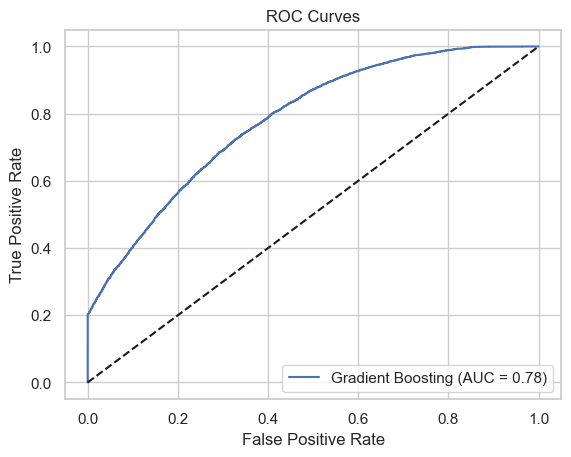

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20122, number of negative: 68750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 88872, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226416 -> initscore=-1.228663
[LightGBM] [Info] Start training from score -1.228663
LightGBM:
Accuracy: 0.8185336873846708
Precision: 0.9575812274368231
Recall: 0.21026555687673404
F1 Score: 0.3448163795905102
ROC AUC Score: 0.759033430031782



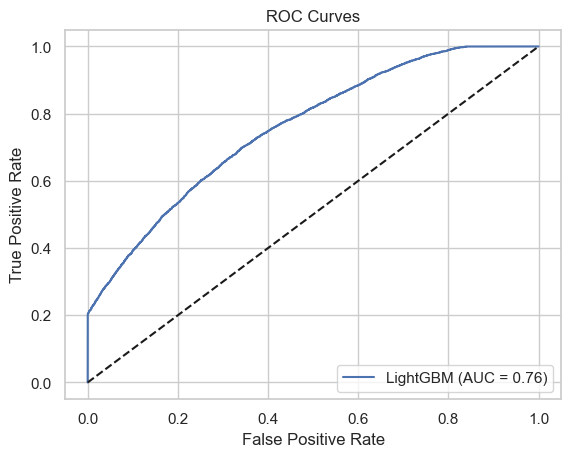

In [28]:
# Placeholder for metrics
model_metrics = []

for name, model in models.items():
    # Initialize model with best parameters
    optimized_model = model.set_params(**best_params[name])
    # Train
    optimized_model.fit(X_train, y_train)
    # Predict
    y_pred = optimized_model.predict(X_test)
    y_pred_proba = optimized_model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}\n")

    model_metrics.append((name, accuracy, precision, recall, f1, roc_auc))

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

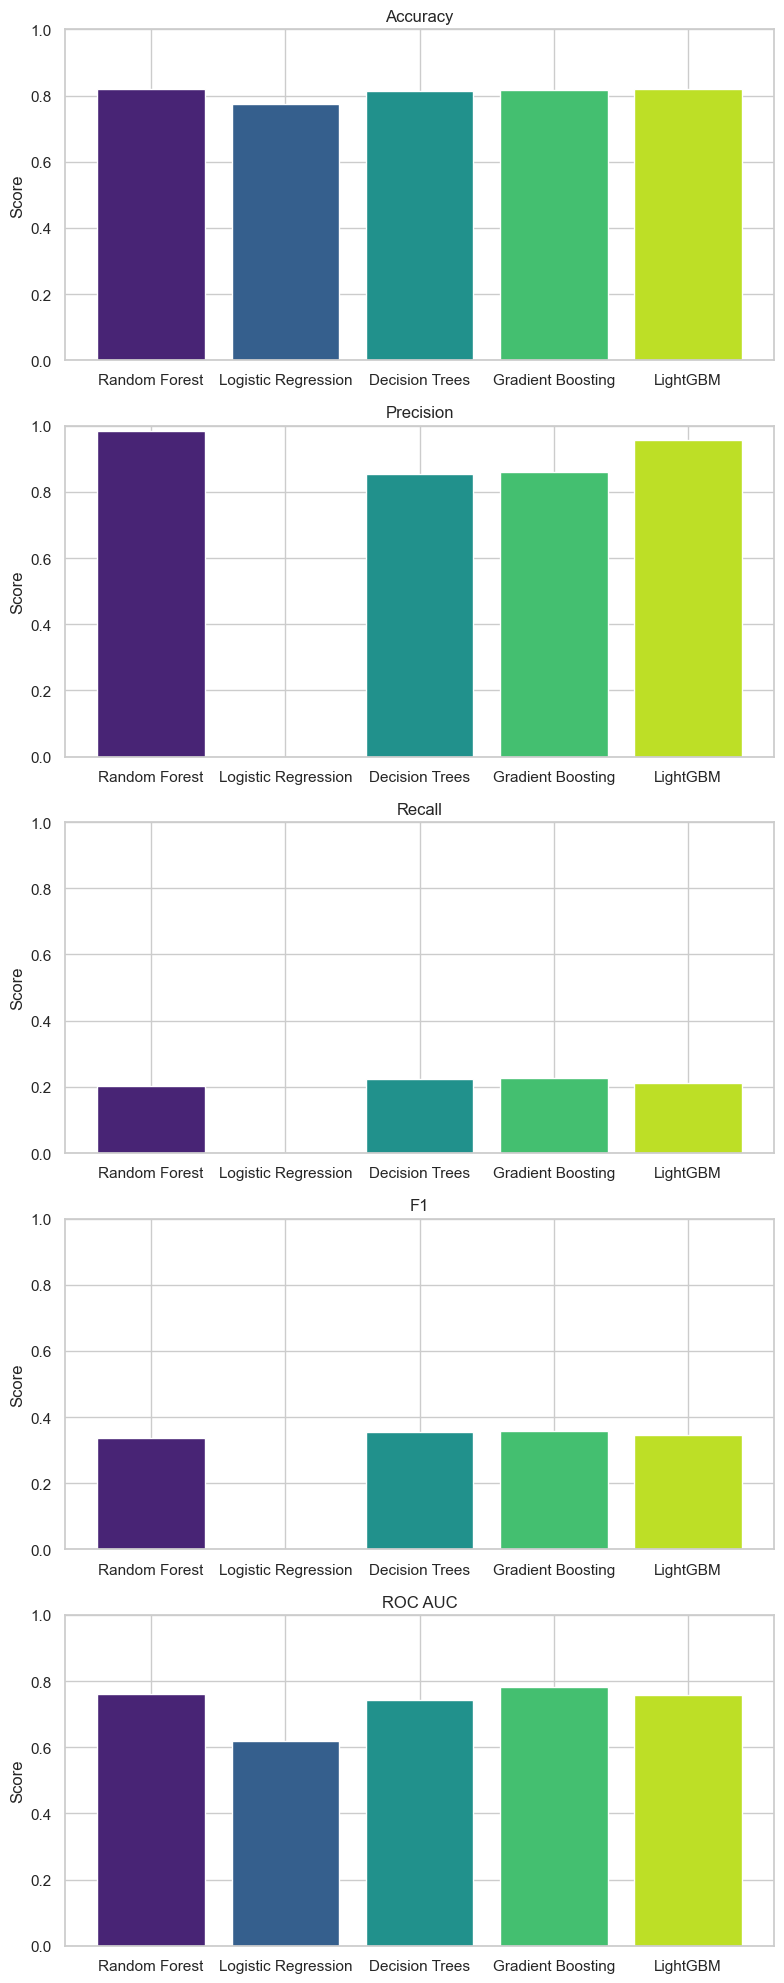

In [29]:
metrics_df = pd.DataFrame(model_metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'])

# Plotting
fig, ax = plt.subplots(5, 1, figsize=(8, 20))

metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
for i, metric in enumerate(metrics_list):
    ax[i].bar(metrics_df['Model'], metrics_df[metric], color=plt.cm.viridis(np.linspace(0.1, 0.9, len(metrics_df))))
    ax[i].set_title(metric)
    ax[i].set_ylabel('Score')
    ax[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### Insight:

#### a. Random Forest
- **Accuracy**: High accuracy suggests the model is effective in classifying the loan eligibility overall.
- **Precision**: High precision indicates a low false positive rate; the model is reliable when it predicts loan eligibility.
- **Recall**: Lower recall suggests the model misses a significant number of actual eligible loans.
- **F1 Score**: The balance between precision and recall shows room for improvement, especially in identifying all relevant instances.
- **ROC AUC Score**: High AUC indicates a good measure of separability and the model's ability to distinguish between classes.

#### b. Logistic Regression
- Demonstrates lower performance across most metrics, especially in precision and recall, indicating it struggles with this dataset.
- The model fails to identify any positive cases correctly, as indicated by zero precision and recall.
- The ROC AUC score is relatively low, suggesting difficulties in distinguishing between the loan eligibility classes.

#### c. Decision Trees
- Shows improved accuracy and a significant increase in recall compared to Logistic Regression, indicating better identification of positive cases.
- The precision is moderately high, suggesting a reasonably low rate of false positives.
- The ROC AUC score reflects a decent ability to distinguish between classes but indicates room for improvement.

#### d. Gradient Boosting
- Exhibits high accuracy, similar to Random Forest, indicating effective overall classification.
- Precision and recall are balanced more effectively than in Random Forest, suggesting improvements in identifying true positives without greatly increasing false positives.
- The ROC AUC score is high, indicating strong separability and confidence in predictions.

#### e. LightGBM
- Similar accuracy to Gradient Boosting, indicating high overall classification performance.
- High precision but lower recall compared to Gradient Boosting, suggesting it's more conservative in predicting loan eligibility.
- The ROC AUC score is slightly lower than Gradient Boosting, indicating a slight decrease in the model's ability to distinguish between classes effectively.

### Conclusion:
- **Gradient Boosting** and **LightGBM** show strong performance, striking a balance between accuracy, precision, and ROC AUC, making them suitable for scenarios where false positives are costly.
- **Random Forest** and **Decision Trees** offer competitive options, with Random Forest leaning towards precision and Decision Trees offering a better recall.
- **Logistic Regression** shows limited predictive capability in this context, as indicated by its lower scores across the board, suggesting it may not be the best fit for this particular problem or data.

**Gradient Boosting** stands out as the best model for predicting loan eligibility, with strong accuracy and the highest ROC AUC score among the evaluated models. Its performance indicates a reliable ability to differentiate between loan approval outcomes, making it the most effective choice for this application.

## Prediction

In [31]:
# Choose best model with best parameters
final_model = GradientBoostingClassifier(max_depth=20, min_samples_leaf=2, n_estimators=300,
                            random_state=42)

final_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=20, min_samples_leaf=2, n_estimators=300,
                           random_state=42)

In [32]:
# Preprocess the input data to match the training preprocessing
def preprocess_input(user_input, encoder):
    # Convert dictionary to DataFrame
    input_df = pd.DataFrame([user_input])
    
    # Convert "Monthly Debt" and "Maximum Open Credit" to numeric, coercing errors
    input_df['Monthly Debt'] = pd.to_numeric(input_df['Monthly Debt'], errors='coerce')
    input_df['Maximum Open Credit'] = pd.to_numeric(input_df['Maximum Open Credit'], errors='coerce')
    
    # Impute missing values for numeric columns
    numeric_imputer = SimpleImputer(strategy='mean')
    numeric_columns_to_impute = ['Credit Score', 'Annual Income', 'Months since last delinquent', 'Bankruptcies', 'Tax Liens']
    input_df[numeric_columns_to_impute] = numeric_imputer.fit_transform(input_df[numeric_columns_to_impute])
    
    # Impute "Years in current job" with mode since it's categorical
    input_df['Years in current job'] = mode_imputer.fit_transform(input_df[['Years in current job']])
    
    # Encoding categorical variables
    categorical_features = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']
    encoded_data = encoder.transform(input_df[categorical_features])

    # Create a DataFrame from the encoded data with the correct feature names
    encoded_columns = encoder.get_feature_names_out(categorical_features)
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
    
    # Drop the original categorical columns and concatenate the new encoded DataFrame
    input_df.drop(columns=categorical_features, inplace=True)
    input_df = pd.concat([input_df.reset_index(drop=True), encoded_df], axis=1)
    
    x_train_columns = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Term_Long Term', 'Term_Short Term',
       'Years in current job_1 year', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'Home Ownership_HaveMortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding']
    input_df = input_df.reindex(columns=x_train_columns, fill_value=0)
    
    return input_df

In [33]:
user_data = {
    'Current Loan Amount': 16514,
    'Term': 'Long Term',
    'Credit Score': 180,
    'Years in current job': '10+ years',
    'Home Ownership': 'Rent',
    'Annual Income': 3000,
    'Purpose': 'Debt Consolidation',
    'Monthly Debt': 733.85,
    'Years of Credit History': 15.9,
    'Months since last delinquent': 28,
    'Number of Open Accounts': 13,
    'Number of Credit Problems': 0,
    'Current Credit Balance': 10024,
    'Maximum Open Credit': 23312,
    'Bankruptcies': 0,
    'Tax Liens': 0
}

# Preprocess the input data
preprocessed_input = preprocess_input(user_data, encoder)

In [35]:
# Make a prediction
prediction = final_model.predict(preprocessed_input)

# Output the prediction result
print("Loan Status Prediction:", "Loan Approved" if prediction[0] == 1 else "Loan Refused")

Loan Status Prediction: Loan Refused
